In [2]:
%matplotlib notebook

import matplotlib.pyplot as plt
from IPython.display import display
import neurokit2 as nk
import pandas as pd
import numpy as np
import seaborn as sns
import os
import pickle
import xlsxwriter

for zz in range(14,15):

    if zz < 10:
        part_number = '20'+str(zz)
    else:
        part_number = '2'+str(zz)


    # Set matplotlib parameters for displaying graphs
    sns.set_style('darkgrid')
    plt.rcParams['figure.figsize'] = [9, 4.5]  # Bigger images
    plt.rcParams['font.size']= 14
    pd.set_option('display.max_columns', None)

    save_dir = '../data/part'+part_number+'/figures/'

    p = '../data/part'+part_number+'/part'+part_number+'_pilot_ecg_signals.p'
    ecg = pickle.load(open(p,"rb"))
    eda = pickle.load(open('../data/part'+part_number+'/part'+part_number+'_pilot_eda_signals.p',"rb"))
    rsp = pickle.load(open('../data/part'+part_number+'/part'+part_number+'_pilot_rsp_signals.p',"rb"))
    data_file = '../data/part'+part_number+'/part'+part_number+'_pilot.acq'
 
    
    rate = 2000

    data, sampling_rate = nk.read_acqknowledge(data_file)
    data = data.rename(columns={"RSP, X, RSPEC-R": "RSP", "DTU100 - Trigger View, AMI / HLT - A11": "TRIG",
                                "EDA, X, PPGED-R": "EDA", "ECG, X, RSPEC-R": "ECG"})

    timestamps=np.loadtxt('../support/trigger timestamps/trigger timestamps.csv',dtype='int',delimiter=',')
    start_times = timestamps[int(part_number[-2:]) - 1]
    feedback_times = timestamps[int(part_number[-2:]) - 1 + 15]

    taskloads_all = np.loadtxt('../support/taskload settings.csv',dtype='int',delimiter=',',encoding='UTF-8')
    taskload_settings = taskloads_all[int(part_number[-2:]) - 1]

    durations = [100,100,100,100,100,100,100,100,100,100,100,100]
    #durations = [633339, 472624, 462436, 479671, 443789, 460186, 451913, 467455, 465081, 407503, 453908, 453551]

    events = {}
    events['onset'] = start_times
    events['duration'] = durations
    events['label']=  [1,2,3,4,5,6,7,8,9,10,11,12]
    events['condition'] =  taskload_settings
    #events['trust'] = trust_settings DOES NOT WORK!

    events_feedback = {}
    events_feedback['onset'] = feedback_times
    events_feedback['duration'] = durations
    events_feedback['label']=  [1,2,3,4,5,6,7,8,9,10,11,12]
    events_feedback['condition'] =  taskload_settings

    ecg_pilot_interval = nk.epochs_create(ecg, events, sampling_rate=rate, epochs_start=0, epochs_end=50)
    eda_pilot_interval = nk.epochs_create(eda, events, sampling_rate=rate, epochs_start=0, epochs_end=50)
    rsp_pilot_interval = nk.epochs_create(rsp, events, sampling_rate=rate, epochs_start=0, epochs_end=50)


    x_axis_pilot = np.linspace(0, ecg_pilot_interval[1].shape[0]/ sampling_rate, ecg_pilot_interval[1].shape[0])

    hrvs = []
    
    #ecg_pilot_interval starts at index 1
    for index in range(1,13):
        display(nk.ecg_intervalrelated(ecg_pilot_interval[index],sampling_rate=rate))
        hrvs.append(nk.ecg_intervalrelated(ecg_pilot_interval[index], sampling_rate=rate))


    filepath = '../data/part'+part_number+'/Time Based HRV Analyses By Trial.csv'
    f=open(filepath,'ab')
    
    #hrvs starts at index 0
    for iind in range(12):
        print('fuck u')
        #np.savetxt(f,hrvs[iind])
    f.close()


,ECG_Rate_Mean,HRV_RMSSD,HRV_MeanNN,HRV_SDNN,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,HRV_pNN50,HRV_pNN20,HRV_TINN,HRV_HTI,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_S,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_PIP,HRV_IALS,HRV_PSS,HRV_PAS,HRV_GI,HRV_SI,HRV_AI,HRV_PI,HRV_C1d,HRV_C1a,HRV_SD1d,HRV_SD1a,HRV_C2d,HRV_C2a,HRV_SD2d,HRV_SD2a,HRV_Cd,HRV_Ca,HRV_SDNNd,HRV_SDNNa,HRV_ApEn,HRV_SampEn
0,109.527148,27.354565,548.197802,32.314675,27.505904,0.058947,0.049899,538.5,15.5673,0.028909,21.25,6.593407,19.78022,151.5,4.136364,NaN,NaN,NaN,0.04794,0.013406,NaN,NaN,0.781472,-3.037805,19.449612,41.456821,0.469153,2533.126032,2.131499,4.110627,353.460627,0.604396,0.590361,0.857143,0.083333,50.990437,51.005619,50.978369,44.578313,0.599147,0.400853,15.055935,12.314979,0.495656,0.504344,29.18678,29.441464,0.514328,0.485672,23.222288,22.566109,0.731468,1.139434


,ECG_Rate_Mean,HRV_RMSSD,HRV_MeanNN,HRV_SDNN,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,HRV_pNN50,HRV_pNN20,HRV_TINN,HRV_HTI,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_S,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_PIP,HRV_IALS,HRV_PSS,HRV_PAS,HRV_GI,HRV_SI,HRV_AI,HRV_PI,HRV_C1d,HRV_C1a,HRV_SD1d,HRV_SD1a,HRV_C2d,HRV_C2a,HRV_SD2d,HRV_SD2a,HRV_Cd,HRV_Ca,HRV_SDNNd,HRV_SDNNa,HRV_ApEn,HRV_SampEn
0,100.631941,31.278271,597.5,32.910841,31.472314,0.055081,0.052349,593.75,33.72915,0.056807,46.0,9.756098,35.365854,159.5,3.727273,NaN,NaN,NaN,0.040753,0.012348,NaN,NaN,0.767457,-3.200225,22.254287,40.775595,0.545775,2850.780996,1.832258,4.161934,298.845635,0.609756,0.6,0.822222,0.190476,50.559419,50.623078,50.497223,44.0,0.43743,0.56257,14.719035,16.692204,0.639357,0.360643,32.604082,24.4872,0.593011,0.406989,25.295021,20.955341,0.62257,1.418383


,ECG_Rate_Mean,HRV_RMSSD,HRV_MeanNN,HRV_SDNN,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,HRV_pNN50,HRV_pNN20,HRV_TINN,HRV_HTI,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_S,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_PIP,HRV_IALS,HRV_PSS,HRV_PAS,HRV_GI,HRV_SI,HRV_AI,HRV_PI,HRV_C1d,HRV_C1a,HRV_SD1d,HRV_SD1a,HRV_C2d,HRV_C2a,HRV_SD2d,HRV_SD2a,HRV_Cd,HRV_Ca,HRV_SDNNd,HRV_SDNNa,HRV_ApEn,HRV_SampEn
0,103.213495,58.197069,582.482353,49.481625,58.546162,0.08495,0.099912,577.0,25.2042,0.043681,33.0,22.352941,49.411765,375.5,4.047619,NaN,NaN,NaN,0.069969,0.044976,NaN,NaN,0.608718,-2.659705,41.398388,56.326482,0.734972,7325.645988,1.360596,4.571816,306.550347,0.635294,0.641975,0.903846,0.263158,49.670482,49.62576,49.724384,45.679012,0.510154,0.489846,29.569043,28.974542,0.755039,0.244961,48.943767,27.877952,0.669151,0.330849,40.434025,28.431534,0.863262,1.78507


,ECG_Rate_Mean,HRV_RMSSD,HRV_MeanNN,HRV_SDNN,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,HRV_pNN50,HRV_pNN20,HRV_TINN,HRV_HTI,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_S,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_PIP,HRV_IALS,HRV_PSS,HRV_PAS,HRV_GI,HRV_SI,HRV_AI,HRV_PI,HRV_C1d,HRV_C1a,HRV_SD1d,HRV_SD1a,HRV_C2d,HRV_C2a,HRV_SD2d,HRV_SD2a,HRV_Cd,HRV_Ca,HRV_SDNNd,HRV_SDNNa,HRV_ApEn,HRV_SampEn
0,100.157076,27.757388,598.698795,41.713522,27.875701,0.069674,0.046363,592.5,20.7564,0.035032,28.0,7.228916,27.710843,235.5,4.611111,NaN,NaN,NaN,0.028566,0.003371,NaN,NaN,0.894446,-3.555536,19.711097,54.783885,0.359797,3392.450337,2.779342,4.237484,609.052679,0.60241,0.6125,0.897959,0.083333,45.157931,45.178512,45.157523,43.75,0.508925,0.491075,14.088181,13.83891,0.618486,0.381514,43.084162,33.838279,0.605886,0.394114,32.052471,25.850963,0.717392,1.258461


,ECG_Rate_Mean,HRV_RMSSD,HRV_MeanNN,HRV_SDNN,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,HRV_pNN50,HRV_pNN20,HRV_TINN,HRV_HTI,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_S,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_PIP,HRV_IALS,HRV_PSS,HRV_PAS,HRV_GI,HRV_SI,HRV_AI,HRV_PI,HRV_C1d,HRV_C1a,HRV_SD1d,HRV_SD1a,HRV_C2d,HRV_C2a,HRV_SD2d,HRV_SD2a,HRV_Cd,HRV_Ca,HRV_SDNNd,HRV_SDNNa,HRV_ApEn,HRV_SampEn
0,101.473589,24.671377,592.512048,27.897458,24.812998,0.047083,0.041639,594.0,25.2042,0.042431,32.75,7.228916,21.686747,142.5,4.368421,NaN,NaN,NaN,0.035569,0.00989,NaN,NaN,0.782444,-3.336269,17.545439,34.665883,0.50613,1910.805067,1.975777,3.988186,273.968272,0.590361,0.589744,0.869565,0.090909,52.314445,52.477183,52.159802,43.589744,0.531315,0.468685,12.794373,12.016642,0.609672,0.390328,27.067644,21.657933,0.593683,0.406317,21.170184,17.513791,0.58855,1.252763


,ECG_Rate_Mean,HRV_RMSSD,HRV_MeanNN,HRV_SDNN,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,HRV_pNN50,HRV_pNN20,HRV_TINN,HRV_HTI,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_S,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_PIP,HRV_IALS,HRV_PSS,HRV_PAS,HRV_GI,HRV_SI,HRV_AI,HRV_PI,HRV_C1d,HRV_C1a,HRV_SD1d,HRV_SD1a,HRV_C2d,HRV_C2a,HRV_SD2d,HRV_SD2a,HRV_Cd,HRV_Ca,HRV_SDNNd,HRV_SDNNa,HRV_ApEn,HRV_SampEn
0,102.291817,18.673317,587.184524,23.552144,18.786173,0.04011,0.031801,581.0,25.57485,0.044019,35.75,3.571429,20.238095,108.0,3.36,NaN,NaN,NaN,0.04981,0.008021,NaN,NaN,0.861299,-2.999535,13.28383,30.667032,0.433163,1279.808324,2.308599,3.814115,283.191464,0.630952,0.628205,0.877551,0.3,49.395349,49.377696,49.413662,50.0,0.499715,0.500285,9.390739,9.396094,0.542861,0.457139,22.595193,20.734611,0.536044,0.463956,17.302149,16.096749,0.649899,2.169054


,ECG_Rate_Mean,HRV_RMSSD,HRV_MeanNN,HRV_SDNN,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,HRV_pNN50,HRV_pNN20,HRV_TINN,HRV_HTI,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_S,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_PIP,HRV_IALS,HRV_PSS,HRV_PAS,HRV_GI,HRV_SI,HRV_AI,HRV_PI,HRV_C1d,HRV_C1a,HRV_SD1d,HRV_SD1a,HRV_C2d,HRV_C2a,HRV_SD2d,HRV_SD2a,HRV_Cd,HRV_Ca,HRV_SDNNd,HRV_SDNNa,HRV_ApEn,HRV_SampEn
0,97.538895,25.538941,615.41358,30.247292,25.696513,0.04915,0.041499,619.0,30.3933,0.049101,39.0,6.17284,23.45679,144.5,4.263158,NaN,NaN,NaN,0.072997,0.022283,NaN,NaN,0.766128,-2.617343,18.170178,38.904776,0.467042,2220.812927,2.141133,4.053482,333.201258,0.567901,0.571429,0.840909,0.111111,51.314772,51.349102,51.279904,44.155844,0.462633,0.537367,12.360551,13.321547,0.622041,0.377959,30.684029,23.918025,0.59349,0.40651,23.391162,19.358919,0.510473,1.12493


,ECG_Rate_Mean,HRV_RMSSD,HRV_MeanNN,HRV_SDNN,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,HRV_pNN50,HRV_pNN20,HRV_TINN,HRV_HTI,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_S,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_PIP,HRV_IALS,HRV_PSS,HRV_PAS,HRV_GI,HRV_SI,HRV_AI,HRV_PI,HRV_C1d,HRV_C1a,HRV_SD1d,HRV_SD1a,HRV_C2d,HRV_C2a,HRV_SD2d,HRV_SD2a,HRV_Cd,HRV_Ca,HRV_SDNNd,HRV_SDNNa,HRV_ApEn,HRV_SampEn
0,100.934465,31.034059,594.698795,32.13813,31.223925,0.054041,0.052184,590.0,19.2738,0.032667,26.25,9.638554,43.373494,178.5,3.772727,NaN,NaN,NaN,0.032339,0.008337,NaN,NaN,0.795033,-3.43147,22.078649,40.00596,0.551884,2774.898268,1.811975,4.150217,289.959196,0.698795,0.697368,0.924528,0.375,50.598719,50.612796,50.580758,50.0,0.479445,0.520555,15.288229,15.93021,0.517812,0.482188,28.787948,27.780045,0.508854,0.491146,23.0486,22.644011,0.689536,1.925291


,ECG_Rate_Mean,HRV_RMSSD,HRV_MeanNN,HRV_SDNN,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,HRV_pNN50,HRV_pNN20,HRV_TINN,HRV_HTI,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_S,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_PIP,HRV_IALS,HRV_PSS,HRV_PAS,HRV_GI,HRV_SI,HRV_AI,HRV_PI,HRV_C1d,HRV_C1a,HRV_SD1d,HRV_SD1a,HRV_C2d,HRV_C2a,HRV_SD2d,HRV_SD2a,HRV_Cd,HRV_Ca,HRV_SDNNd,HRV_SDNNa,HRV_ApEn,HRV_SampEn
0,99.259856,43.704641,603.908537,45.498415,43.973925,0.07534,0.07237,608.5,25.57485,0.042029,34.5,12.195122,43.902439,267.0,4.1,NaN,NaN,NaN,0.063069,0.019158,NaN,NaN,0.767015,-2.763521,31.094261,56.667799,0.548711,5535.622287,1.822452,4.450137,413.097378,0.634146,0.644737,0.877551,0.190476,48.996858,49.045215,48.957258,50.0,0.486517,0.513483,21.689967,22.282981,0.541859,0.458141,41.713787,38.356217,0.529051,0.470949,33.24526,31.366628,0.789269,1.609438


,ECG_Rate_Mean,HRV_RMSSD,HRV_MeanNN,HRV_SDNN,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,HRV_pNN50,HRV_pNN20,HRV_TINN,HRV_HTI,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_S,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_PIP,HRV_IALS,HRV_PSS,HRV_PAS,HRV_GI,HRV_SI,HRV_AI,HRV_PI,HRV_C1d,HRV_C1a,HRV_SD1d,HRV_SD1a,HRV_C2d,HRV_C2a,HRV_SD2d,HRV_SD2a,HRV_Cd,HRV_Ca,HRV_SDNNd,HRV_SDNNa,HRV_ApEn,HRV_SampEn
0,97.191178,39.380447,618.68125,41.142716,39.626651,0.066501,0.063652,622.5,35.5824,0.05716,46.75,17.5,46.25,210.5,4.705882,NaN,NaN,NaN,0.051261,0.003897,NaN,NaN,0.92935,-2.970822,28.020274,50.735362,0.552283,4466.146965,1.810666,4.356903,367.459209,0.7,0.685714,0.916667,0.416667,51.223569,51.323448,51.127466,41.428571,0.493753,0.506247,19.691857,19.939452,0.617454,0.382546,39.866956,31.379973,0.588536,0.411464,31.44156,26.289584,0.569433,2.181224


,ECG_Rate_Mean,HRV_RMSSD,HRV_MeanNN,HRV_SDNN,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,HRV_pNN50,HRV_pNN20,HRV_TINN,HRV_HTI,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_S,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_PIP,HRV_IALS,HRV_PSS,HRV_PAS,HRV_GI,HRV_SI,HRV_AI,HRV_PI,HRV_C1d,HRV_C1a,HRV_SD1d,HRV_SD1a,HRV_C2d,HRV_C2a,HRV_SD2d,HRV_SD2a,HRV_Cd,HRV_Ca,HRV_SDNNd,HRV_SDNNa,HRV_ApEn,HRV_SampEn
0,97.167048,75.020617,618.537975,66.601223,75.50619,0.107675,0.121287,605.0,60.0453,0.099248,95.5,27.848101,46.835443,311.5,4.157895,NaN,NaN,NaN,0.153173,0.035011,NaN,NaN,0.813953,-1.876184,53.390939,77.948542,0.684951,13074.510065,1.459958,4.823396,455.206465,0.56962,0.561644,0.804878,0.136364,50.021419,50.177119,49.867118,41.09589,0.416845,0.583155,34.471073,40.771775,0.756513,0.243487,67.797888,38.463249,0.648044,0.351956,53.781077,39.634324,0.538818,1.689481


,ECG_Rate_Mean,HRV_RMSSD,HRV_MeanNN,HRV_SDNN,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,HRV_pNN50,HRV_pNN20,HRV_TINN,HRV_HTI,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_S,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_PIP,HRV_IALS,HRV_PSS,HRV_PAS,HRV_GI,HRV_SI,HRV_AI,HRV_PI,HRV_C1d,HRV_C1a,HRV_SD1d,HRV_SD1a,HRV_C2d,HRV_C2a,HRV_SD2d,HRV_SD2a,HRV_Cd,HRV_Ca,HRV_SDNNd,HRV_SDNNa,HRV_ApEn,HRV_SampEn
0,99.357026,15.969404,602.987654,29.134384,16.039793,0.048317,0.026484,601.0,21.4977,0.03577,26.0,1.234568,12.345679,145.0,4.05,NaN,NaN,NaN,0.01597,0.001789,NaN,NaN,0.89927,-4.137073,11.341846,39.377966,0.288025,1403.094467,3.471918,3.854057,546.868343,0.666667,0.666667,0.88,0.333333,45.506583,45.542707,45.476226,52.0,0.468281,0.531719,7.776038,8.286026,0.54126,0.45874,28.970515,26.670835,0.53565,0.46435,21.210345,19.748312,0.558119,0.936493


fuck u
fuck u
fuck u
fuck u
fuck u
fuck u
fuck u
fuck u
fuck u
fuck u
fuck u
fuck u


In [6]:
plt.figure()
plt.plot(ecg)


In [35]:
np.savetxt('clean.txt',ecg_pilot_interval[11]['ECG_Clean'])

<IPython.core.display.Javascript object>


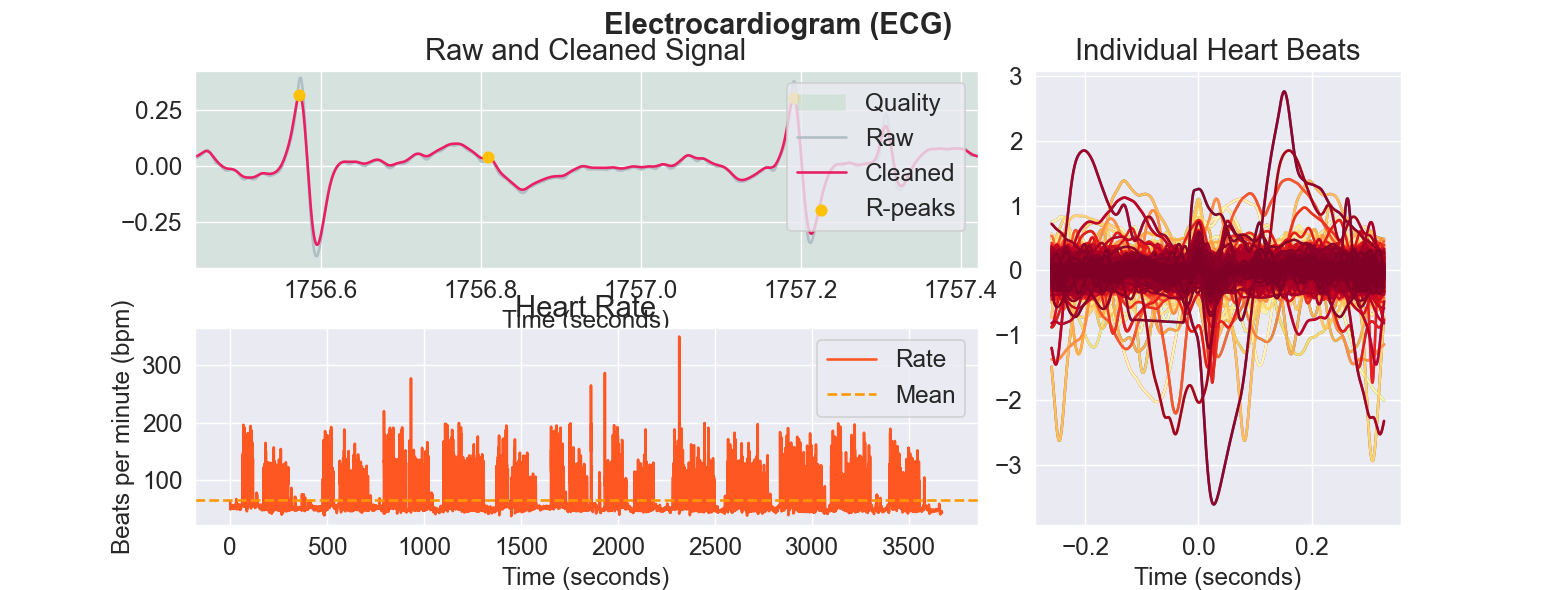

In [30]:
plt.figure()
plot = nk.ecg_plot(ekg[0], sampling_rate=2000)

<IPython.core.display.Javascript object>


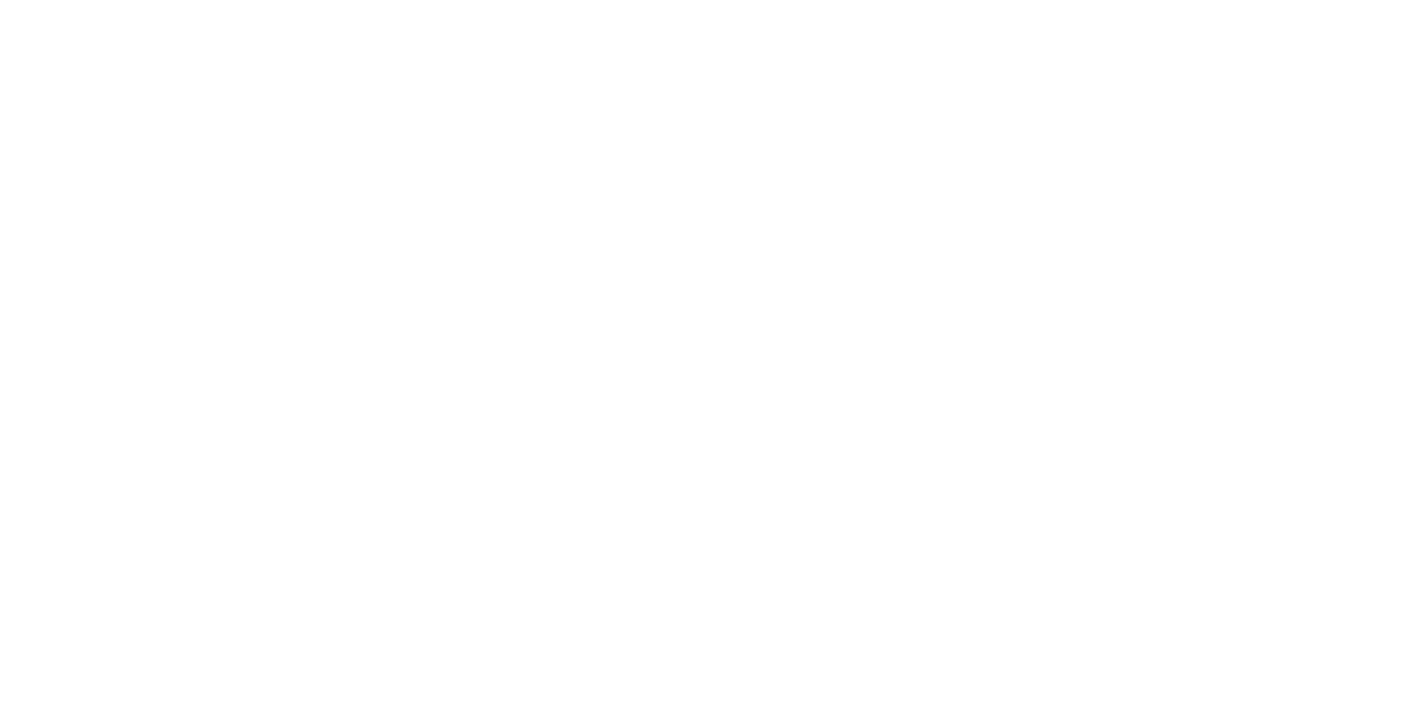

<IPython.core.display.Javascript object>


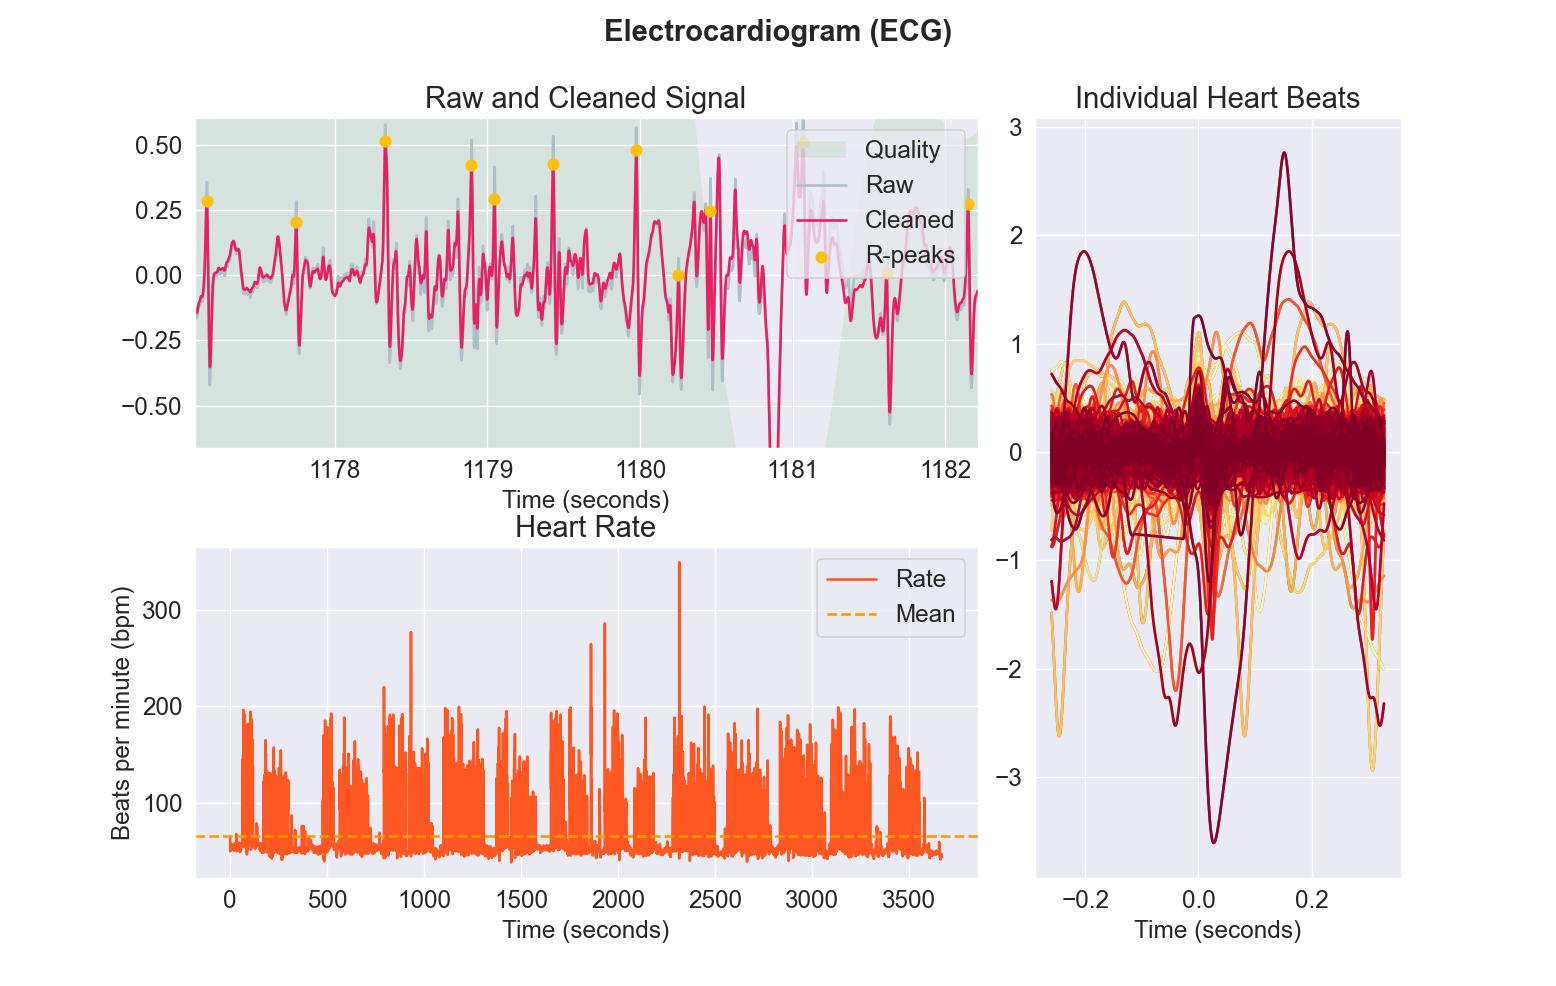

In [31]:
plt.figure()
plot = nk.ecg_plot(ekg[0], sampling_rate=2000)

<IPython.core.display.Javascript object>


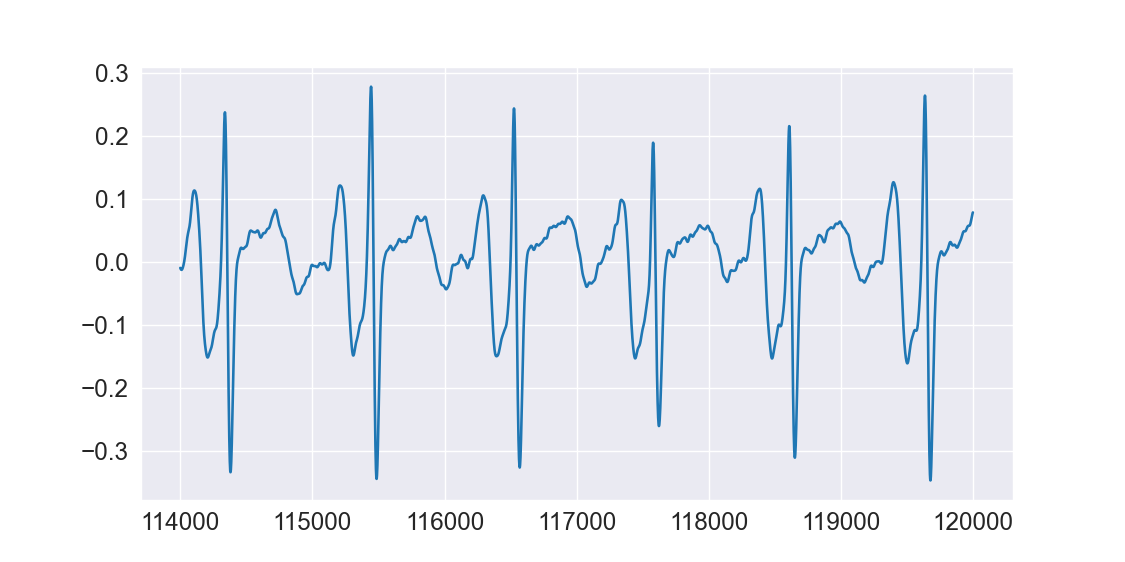

In [28]:
plt.figure()
plt.plot(ekg[0]['ECG_Clean'][114000:120000])